<a href="https://colab.research.google.com/github/tetarwal23/aiml-assignment-1-house-price-prediction-on-boston-dataset-/blob/main/24-AFI-07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/MyDrive/boston_dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/boston_dataset/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [22]:
train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [23]:
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [25]:
train.isna().sum()

,0
ID,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


In [26]:
X = train.drop(['medv'],axis = 1 )
y = train['medv']
X

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [9]:
y

,medv
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9
...,...
328,17.5
329,22.4
330,20.6
331,23.9


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)

print("XTrain shape : ", X_train.shape)
print("XVal shape  : ", X_val.shape)
print("yTrain shape : ", y_train.shape)
print("yVal shape  : ", y_val.shape)

XTrain shape :  (266, 14)
XVal shape  :  (67, 14)
yTrain shape :  (266,)
yVal shape  :  (67,)


In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_val)
regressor.intercept_

38.38379202349243

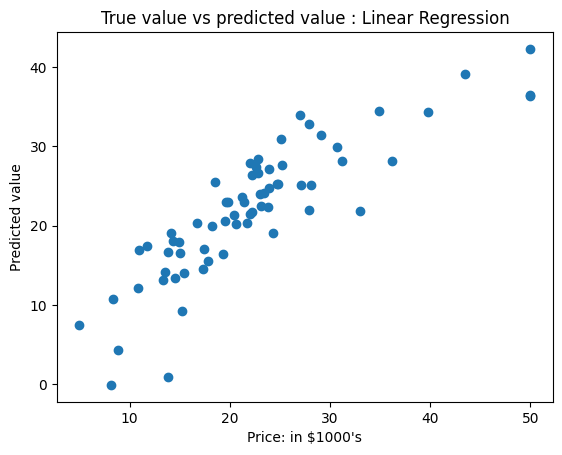

In [29]:
plt.scatter(y_val, y_pred)
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Square Error : ", rmse)

Root Mean Square Error :  4.838564025266024


In [31]:
corr = X_train.corr()
corr.shape

(14, 14)

<Axes: >

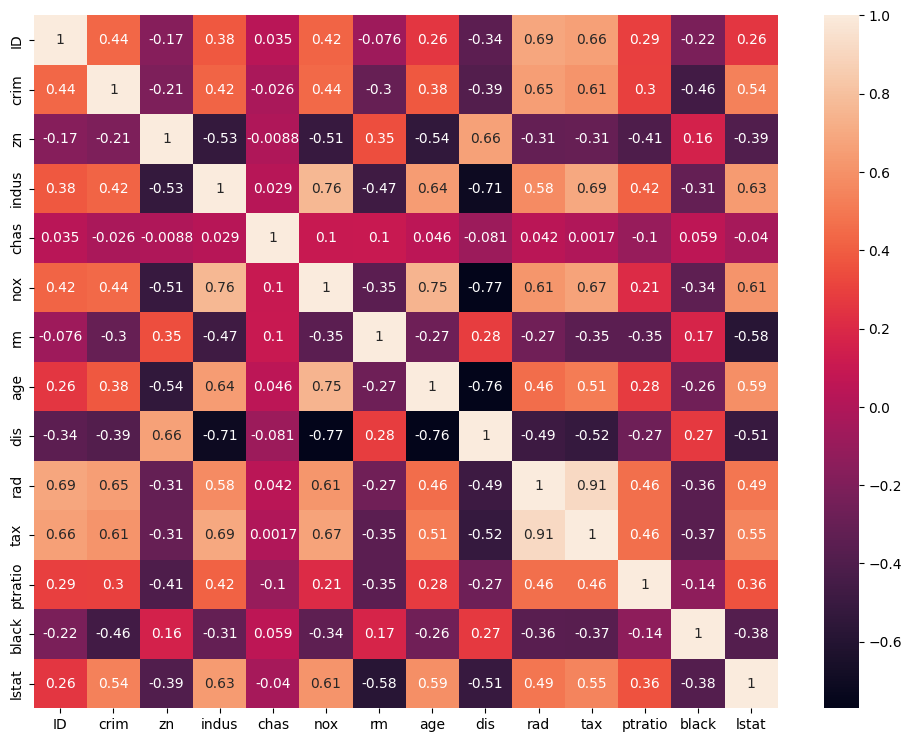

In [32]:
plt.figure(figsize=(12,9))
sns.heatmap(corr , annot = True)

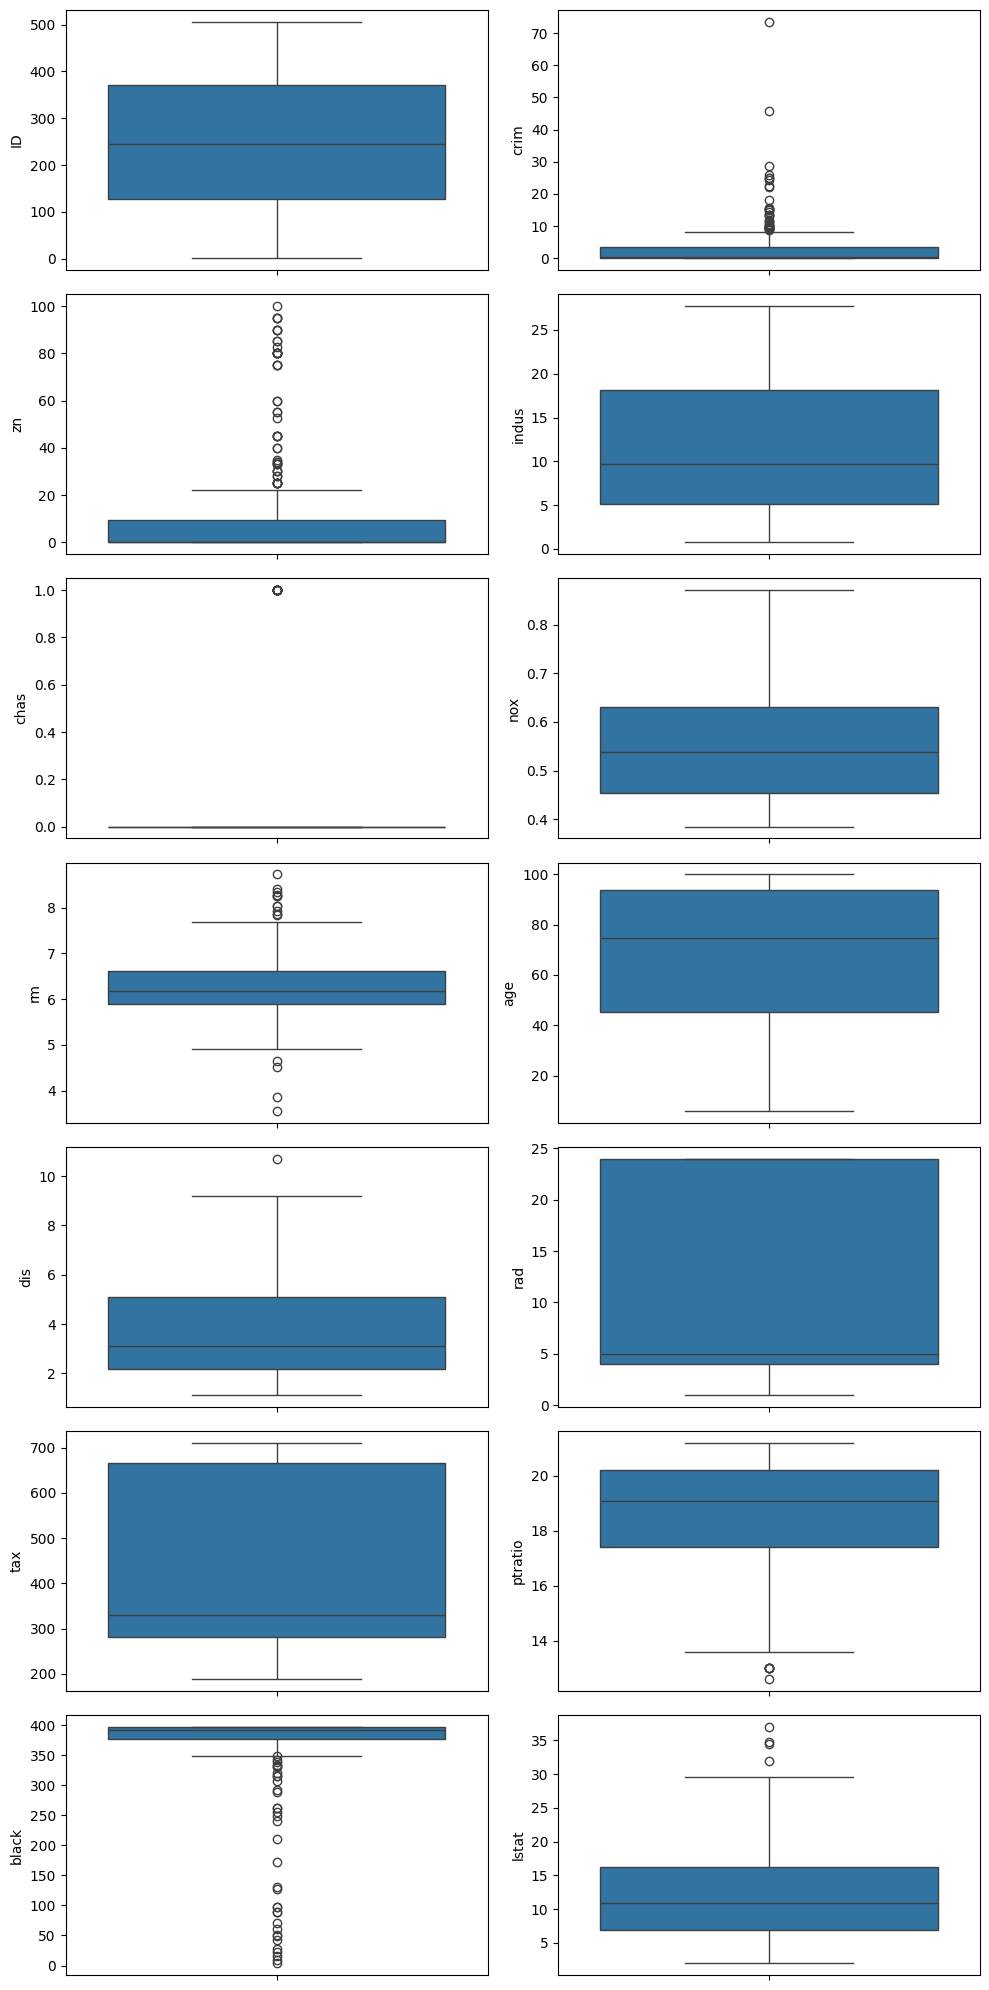

In [33]:
fig, axs = plt.subplots(nrows=7,ncols=2,figsize=(10,20))
index = 0
axs = axs.flatten()
for k,v in X_train.items():
    sns.boxplot(y=k,data=X_train,ax=axs[index])
    index+=1
plt.tight_layout()

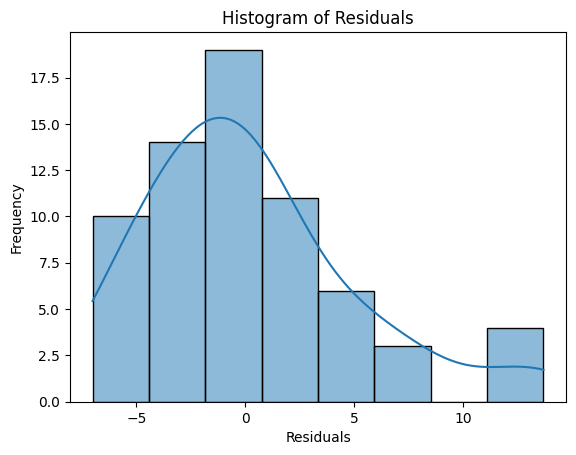

In [34]:
sns.histplot(y_val-y_pred , kde = True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [35]:
y_test_pred = regressor.predict(test)
for x, y in zip(test['ID'],y_test_pred):
    print(x, y, sep='\t\t')

3		30.694675743960293
6		25.674399982248183
8		17.456287222588507
9		8.348672821813992
10		17.055693994441512
18		17.278619185435616
20		19.61659455995901
25		15.595046950313115
26		13.634321792278705
27		15.553299785140567
29		19.58691543205689
30		21.142665299319766
33		7.961980362798364
34		14.298182908825101
36		24.92717253571238
37		23.4168953154156
38		24.544245868271467
42		28.756572960427327
49		5.9304441036939295
53		27.880118970136113
60		21.80510497232633
63		24.320362740459583
70		20.864817936523075
72		22.10701918771548
79		20.636270837317397
80		22.765351961280167
83		26.915053237835984
92		27.681078453257623
93		29.42581386140561
96		29.03123076565368
98		35.52627081965141
99		35.64321093071559
100		32.24058473781598
105		22.073867851448796
106		18.85209024970461
111		21.588393335154116
113		20.43086599829748
114		20.08200426882424
116		20.21234032697047
126		21.85072152839266
130		13.848176878461402
131		19.994795257606246
133		20.169648834575636
136		16.77912403316973
